In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<h1 style="color:darkred"> <p style="text-align:center"> Inflación </p> </h1>

<h2 style="color:darkred"> <p style="text-align:center"> Obtención de datos </p> </h2>

In [2]:
data = pd.read_csv('../data/Inflación.csv', parse_dates=['Periodos'], index_col=['Periodos'])
data

,INPC,INPC S,INPC NS,Inf
Periodos,,,,
1982-01-01,0.085866,0.092901,0.066882,4.97
1982-02-01,0.089240,0.096869,0.068800,3.93
1982-03-01,0.092499,0.101014,0.069947,3.65
1982-04-01,0.097512,0.106836,0.072961,5.42
1982-05-01,0.102993,0.113471,0.075646,5.62
...,...,...,...,...
2021-11-01,116.884000,114.799064,123.327375,1.14
2021-12-01,117.308000,115.720705,122.212431,0.36
2022-01-01,118.002000,116.432721,122.851149,0.59


<p style="text-align:justify">
    <font face="times new roman" size="4">
        <div style="text-align:left">
        Los datos antes mostrados fueron tomados del Banco de Información Económica 
        (<a href="https://www.inegi.org.mx/app/indicadores/?tm=0#bodydataExplorer">BIE</a>) perteneciente al INEGI. Se tomó el 
        Índice Nacional de Precios al Consumidor mensual junto a su componente Subyacente y No Subyacente. Por último, se tomó 
        la inflación para hacer un contraste entre la inflación reportada y la inflación que se calculará.
        </div>
    </font>

<p style="text-align:justify">
    <font face="times new roman" size="4">
        <div style="text-align:left">
        Existen dos opciones, se puede calcular mediante una función ya establecida en la librería Pandas ó puede ser calculada 
        mediante código que depende de las habilidades de programación de cada persona.
        </div>
    </font>

<p style="text-align:justify">
    <font face="times new roman" size="4">
        <div style="text-align:left">
        A continuación se muestra un código sencillo que calcula la tasa de inflación usando un bucle e imprime el resultado.
        El código solicita una cantidad de rezagos y calcula el cambio porcentual basado en ese dato y se pierde una cantidad 
        homóloga de información por estar trabajando con diferencias. Existen más cosas que se le pueden aplicar a este código 
        porque aún carece de protección ante errores, eso se puede solucionar con try y except. Cómo se dijo antes, todo 
        depende de las habilidades en programación de la persona.
        </div>
    </font>

<p style="text-align:justify">
    <font face="times new roman" size="4">
        <div style="text-align:left">
        Para cálcular el cambio porcentual de una serie de tiempo ($ Y_{t} $) ante $ k $ rezagos, se tiene la siguiente 
        fórmula:
        </div>
    </font>
</p>

### $$ \Delta \% Y_{t} = \frac{Y_{t}}{Y_{t-k}} - 1$$

In [3]:
inflacion_mensual = []

rezago = int(input('Cantidad de rezagos: '))
for i in range(len(data.index)):
    if (i-rezago) < 0: # En caso de que i-rezago sea un número negativo, se imprime NaN porque no existe el tiempo negativo.
        inflacion_mensual.append('NaN')
    else:
        inflacion_mensual.append((data.INPC[i]/data.INPC[i-rezago])-1)

Cantidad de rezagos: 1


In [4]:
inflacion_mensual[-5:]

[0.011448499061101902,
 0.0036275281475650623,
 0.005916050056262057,
 0.008296469551363428,
 0.009900740454358292]

<p style="text-align:justify">
    <font face="times new roman" size="4">
        <div style="text-align:left">
        Con Pandas se puede obtener el mismo resultado usando el método pct_change(). Dicho método puede tener más atributos 
        que se detallan en su <a href='https://pandas.pydata.org/docs/user_guide/index.html'> documentación</a>, para un 
        economista, el principal es la cantidad de rezagos que se desean utilizar y basta con poner un número en el parentesis.
        Y al resultado se le debe multiplicar por 100 para obtener el porcentaje.
        </div>
    </font>
</p>

In [5]:
data.INPC.pct_change()

Periodos
1982-01-01         NaN
1982-02-01    0.039295
1982-03-01    0.036523
1982-04-01    0.054196
1982-05-01    0.056208
                ...   
2021-11-01    0.011448
2021-12-01    0.003628
2022-01-01    0.005916
2022-02-01    0.008296
2022-03-01    0.009901
Name: INPC, Length: 483, dtype: float64

<h2 style="color:darkred"> <p style="text-align:center"> Cálcular la variación anual y mensual del INPC </p> </h2>

<p style="text-align:justify">
    <font face="times new roman" size="4">
        <div style="text-align:left">
        Usando lo anterior, se procede a calcular la inflación general, subyacente y no subyacente para periodicidad mensual y 
        anual.
        </div>
    </font>
</p>

In [6]:
data_inflacion_mensual = pd.DataFrame(index=data.index)
data_inflacion_mensual['General'] = data['INPC'].pct_change()
data_inflacion_mensual['Subyacete'] = data['INPC S'].pct_change()
data_inflacion_mensual['No Subyacete'] = data['INPC NS'].pct_change()
data_inflacion_mensual = data_inflacion_mensual.dropna()
data_inflacion_mensual

,General,Subyacete,No Subyacete
Periodos,,,
1982-02-01,0.039295,0.042712,0.028670
1982-03-01,0.036523,0.042789,0.016680
1982-04-01,0.054196,0.057639,0.043078
1982-05-01,0.056208,0.062109,0.036807
1982-06-01,0.048172,0.052500,0.033575
...,...,...,...
2021-11-01,0.011448,0.003682,0.034479
2021-12-01,0.003628,0.008028,-0.009041
2022-01-01,0.005916,0.006153,0.005226


In [7]:
data_inflacion_anual = pd.DataFrame(index=data.index)
data_inflacion_anual['General'] = data['INPC'].pct_change(12)
data_inflacion_anual['Subyacete'] = data['INPC S'].pct_change(12)
data_inflacion_anual['No Subyacete'] = data['INPC NS'].pct_change(12)
data_inflacion_anual = data_inflacion_anual.dropna()
data_inflacion_anual

,General,Subyacete,No Subyacete
Periodos,,,
1983-01-01,1.100436,1.101185,1.098110
1983-02-01,1.129479,1.140398,1.094985
1983-03-01,1.153884,1.156816,1.144424
1983-04-01,1.172510,1.155418,1.228650
1983-05-01,1.146106,1.117067,1.243856
...,...,...,...
2021-11-01,0.073749,0.056675,0.126113
2021-12-01,0.073551,0.059357,0.117355
2022-01-01,0.070701,0.062062,0.096825


<p style="text-align:justify">
    <font face="times new roman" size="4">
        <div style="text-align:left">
        Al graficar los resultados de la inflación general con periodicidad mensual que se calculó junto a la inflación
        obtenida de INEGI, se observa que se transponen entre si, por lo tanto, se concluye que se obtuvo un valor igual o 
        cercano a los valores oficiales.
        </div>
    </font>
</p>

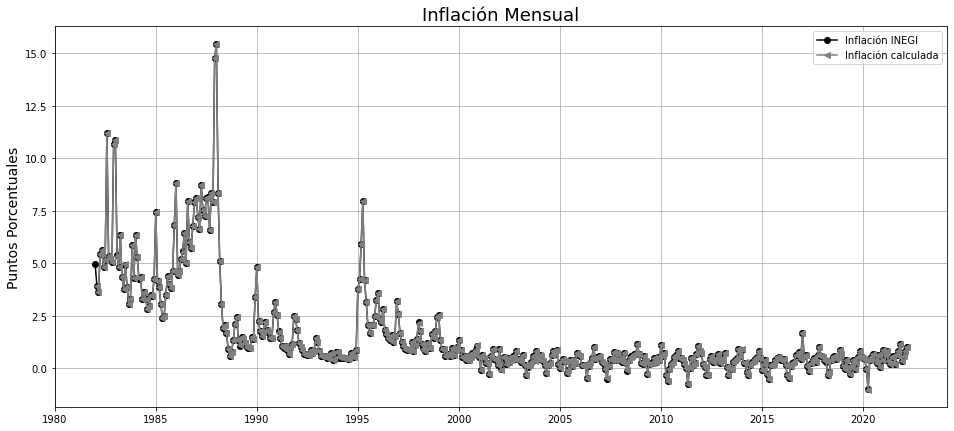

In [8]:
plt.figure(figsize=[16,7]) # Determina el tamaño del gráfico

plt.plot(data.Inf, label='Inflación INEGI', color='black', marker='o')
plt.plot((data_inflacion_mensual.General)*100, label='Inflación calculada', color='gray', marker='<')

plt.title('Inflación Mensual', size=18)
plt.ylabel('Puntos Porcentuales', size=14)
plt.legend() # Muestra la leyenda de las series
plt.grid() # Muestra la cuadrícula

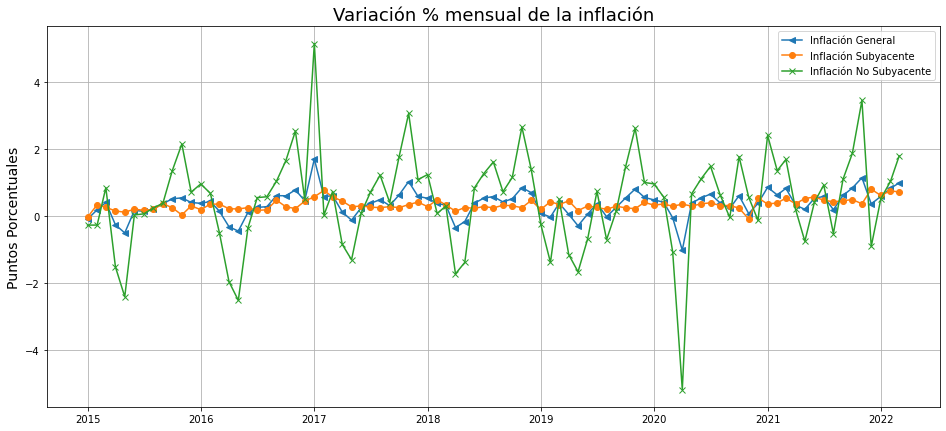

In [9]:
plt.figure(figsize=[16,7]) # Determina el tamaño del gráfico

plt.plot((data_inflacion_mensual['General'].loc['2015':])*100, label='Inflación General', marker='<')
plt.plot((data_inflacion_mensual['Subyacete'].loc['2015':])*100, label='Inflación Subyacente', marker='o')
plt.plot((data_inflacion_mensual['No Subyacete'].loc['2015':])*100, label='Inflación No Subyacente', marker='x')

plt.title('Variación % mensual de la inflación', size=18)
plt.ylabel('Puntos Porcentuales', size=14)
plt.legend() # Muestra la leyenda de las series
plt.grid() # Muestra la cuadrícula

<p style="text-align:justify">
    <font face="times new roman" size="4">
        <div style="text-align:left">
        Sabiendo que la inflación anual es una referencia para observar la evolución en el poder adquisitivo a lo largo del
        año. En este caso se puede hacer contraste con la meta de Banco de México que es tener una inflación del 3% con 
        una banda de $\pm$1%
        </div>
    </font>
</p>

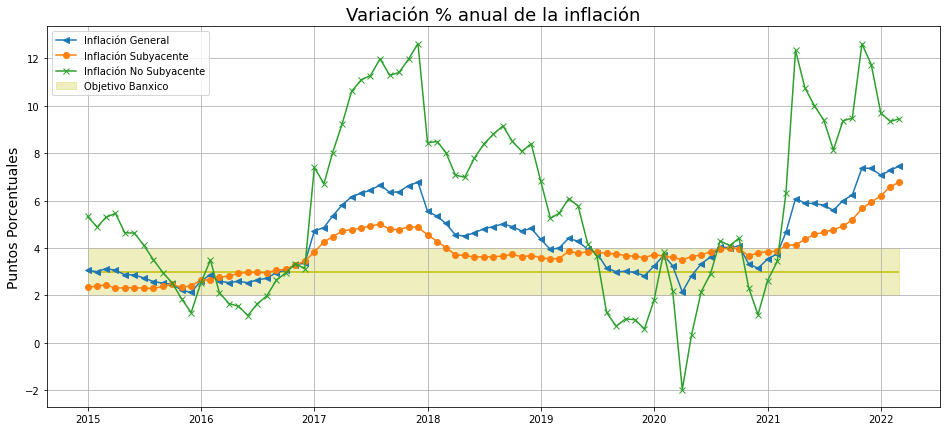

In [10]:
plt.figure(figsize=[16,7]) # Determina el tamaño del gráfico

# .loc['2015':] Sirve para seleccionar un periodo en especifico, 
#               para mayor comprensión busque Indexing and selecting data de pandas

plt.plot((data_inflacion_anual['General'].loc['2015':])*100, label='Inflación General', marker='<')
plt.plot((data_inflacion_anual['Subyacete'].loc['2015':])*100, label='Inflación Subyacente', marker='o')
plt.plot((data_inflacion_anual['No Subyacete'].loc['2015':])*100, label='Inflación No Subyacente', marker='x')
plt.hlines(3, data_inflacion_anual.loc['2015'].index[0], data_inflacion_anual.index[-1], color='y')
plt.fill_between(data_inflacion_anual.loc['2015':].index, y1=2, y2=4, color='y', alpha=0.25, label='Objetivo Banxico')

plt.title('Variación % anual de la inflación', size=18) # Titulo
plt.ylabel('Puntos Porcentuales', size=14)
plt.legend() # Muestra la leyenda de las series
plt.grid() # Muestra la cuadrícula

<p style="text-align:justify">
    <font face="times new roman" size="4">
        <div style="text-align:left">
        Para obtener la inflación acumulada en el año se debe sumar la inflación de cada mes del año de estudio. En el caso de
        abajo se utilizó la inflación hasta marzo de 2022 por ser el último dato disponible y sirve como ejemplo para que pueda
        ser revisado por el lector. Los valores pueden discrepar ligeramente por efectos de redondeo.
        </div>
    </font>
</p>

In [11]:
(data_inflacion_mensual['General'].loc['2022']*100).sum()

2.4113260061983777